In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
hatches = ['+', 'x', 'o', '.', '*',"/"]
sns.set(font_scale=0.75)

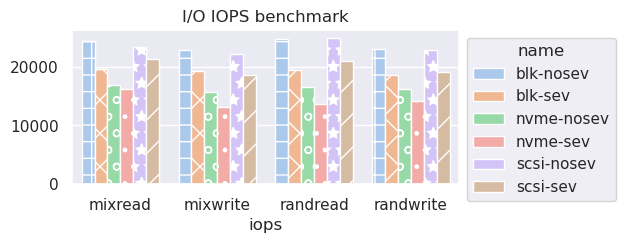

In [2]:
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.1f')
df=pd.read_csv("iops_results.csv")
df = df.sort_values(['group', 'name'],ascending = [True, True])
# print(df.to_latex(index=False))
sns.set(rc={'figure.figsize':(5,2)})
ax=sns.barplot(df, x="group",y="result",hue="name",orient="v", width=0.8,palette="pastel")
ax.set(xlabel ="iops", ylabel = "", title ='I/O IOPS benchmark')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
for i, container in enumerate(ax.containers):
    for patch in container.patches:
        patch.set_hatch(hatches[i % len(hatches)])
plt.show()

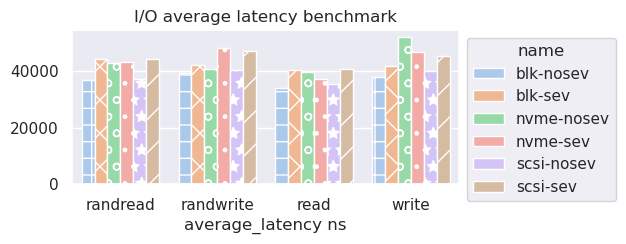

In [3]:
df=pd.read_csv("al_results.csv")
df = df.sort_values(['group', 'name'],ascending = [True, True])
# print(df.to_latex(index=False))
sns.set(rc={'figure.figsize':(5,2)})
ax=sns.barplot(df, x="group",y="result",hue="name",orient="v", width=0.8,palette="pastel")
ax.set(xlabel ="average_latency ns", ylabel = "", title ='I/O average latency benchmark')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
for i, container in enumerate(ax.containers):
    for patch in container.patches:
        patch.set_hatch(hatches[i % len(hatches)])
plt.show()

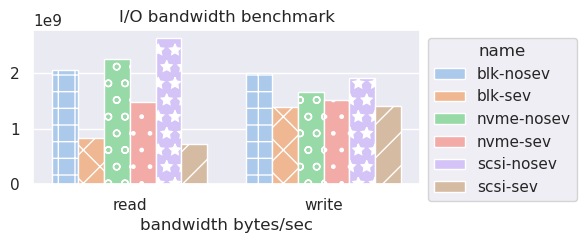

In [4]:
df=pd.read_csv("bw_results.csv")
df = df.sort_values(['group', 'name'],ascending = [True, True])
# print(df.to_latex(index=False))
sns.set(rc={'figure.figsize':(5,2)})
ax=sns.barplot(df, x="group",y="result",hue="name",orient="v", width=0.8, palette="pastel")
ax.set(xlabel ="bandwidth bytes/sec", ylabel = "", title ='I/O bandwidth benchmark')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
for i, container in enumerate(ax.containers):
    for patch in container.patches:
        patch.set_hatch(hatches[i % len(hatches)])
plt.show()

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
sns.set(font_scale=0.5)

sns.set(rc={'figure.figsize':(2,1)})
def plot(filename,title):
    df=pd.read_csv(filename)
    avg_df = df.groupby('benchmark_name')['benchmark_result'].mean().reset_index()
    g1=sns.barplot(data=avg_df,x='benchmark_name', y='benchmark_result',orient="vertical")
    g1.set(xlabel=None)
    g1.set(ylabel=None)
    plt.legend([],[], frameon=False)
    plt.margins(y=1)
    g1.bar_label(g1.containers[0], label_type='edge')
    plt.title(title)
    plt.show()

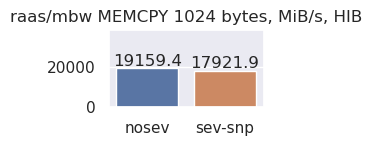

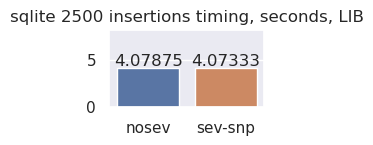

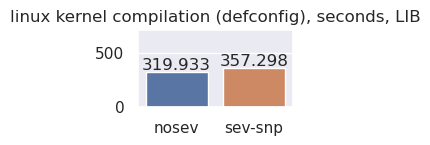

In [6]:
plot("memory.csv","raas/mbw MEMCPY 1024 bytes, MiB/s, HIB")
plot("io.csv","sqlite 2500 insertions timing, seconds, LIB")
plot("compilation.csv","linux kernel compilation (defconfig), seconds, LIB")

In [7]:
put numbers on top of bars
write “lower is better” or “higher is better”
write unit2:50
it’s good if graphs look like
https://github.com/TUM-DSE/ushell/blob/main/misc/tests/measurements/eurosys24/console.pdf
2:52
plot scripts are here but it maybe not so usuful as it’s not well organized
but anyway I think you can check some configuration of seaborn/matplotlib
https://github.com/TUM-DSE/ushell/blob/main/misc/tests/graphs.py

SyntaxError: invalid character '“' (U+201C) (1750780425.py, line 2)